In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data = pd.read_csv('C:/Users/Ram Yadav/Downloads/data/Titanic/titanic_train.csv')


In [4]:
test_data = pd.read_csv('C:/Users/Ram Yadav/Downloads/data/Titanic/titanic_test.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_data.shape

(891, 12)

In [8]:
test_data.shape

(418, 11)

In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#missing Data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train_data.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

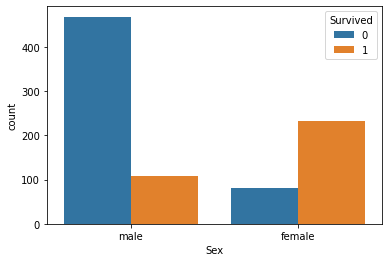

In [12]:
sns.countplot(x=train_data.Sex,data=train_data,hue='Survived')

In [13]:
train_data.groupby(['Survived'])['Pclass'].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

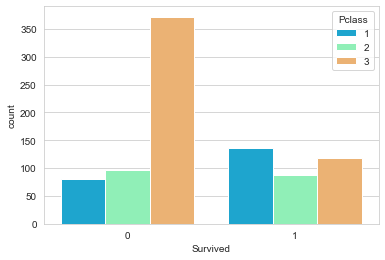

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data,palette='rainbow')

<AxesSubplot:xlabel='Age'>

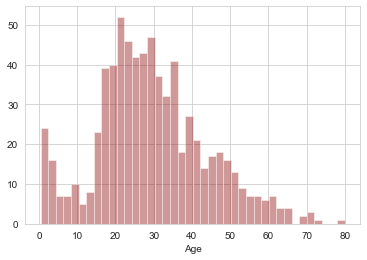

In [15]:
sns.distplot(train_data['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

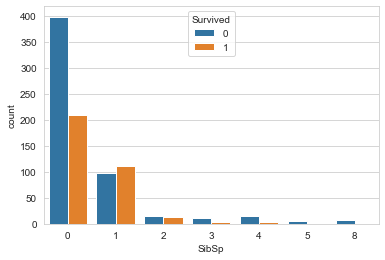

In [16]:
sns.countplot(x='SibSp',hue='Survived',data=train_data)

<AxesSubplot:>

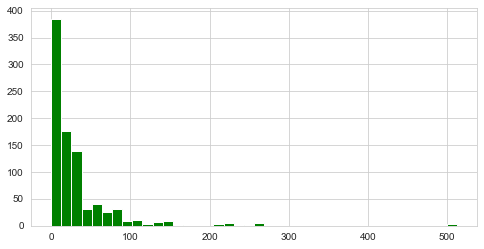

In [17]:
train_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

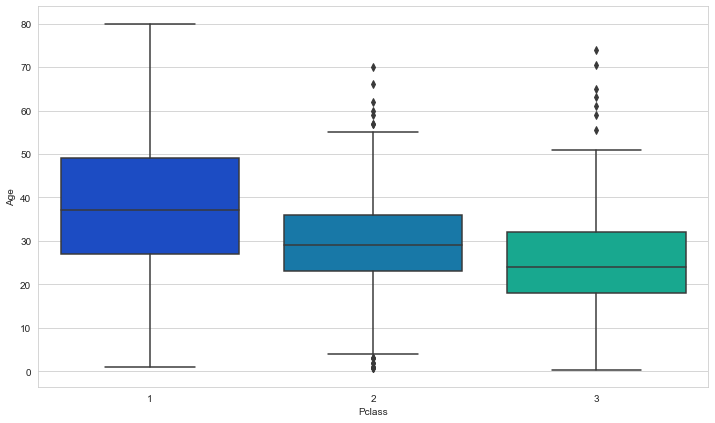

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

In [19]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
train_data['Age']=train_data[['Age','Pclass']].apply(input_age,axis=1)

In [21]:
test_data['Age'] = test_data[['Age','Pclass']].apply(input_age,axis=1)

<AxesSubplot:>

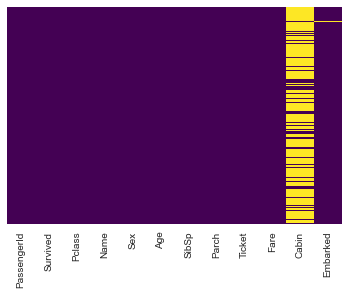

In [22]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
train_data.drop('Cabin',axis=1,inplace=True)

In [25]:
test_data.drop('Cabin',axis=1,inplace=True)

In [26]:
test_data['Fare'].fillna(test_data['Fare'].median(),inplace=True)

In [27]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [28]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

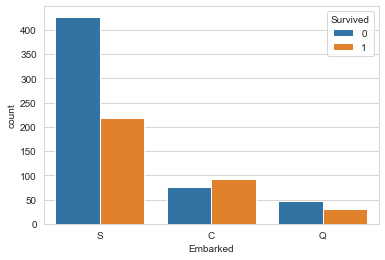

In [29]:
sns.countplot(x='Embarked',data=train_data,hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

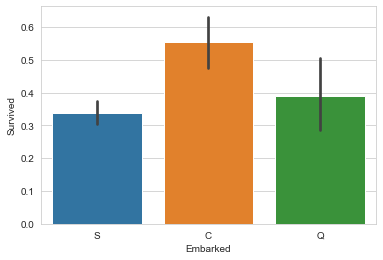

In [30]:
sns.barplot(x='Embarked',y='Survived',data=train_data)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

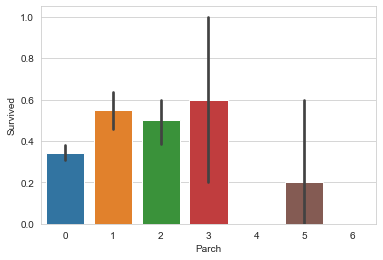

In [31]:
sns.barplot(x='Parch',y='Survived',data=train_data)

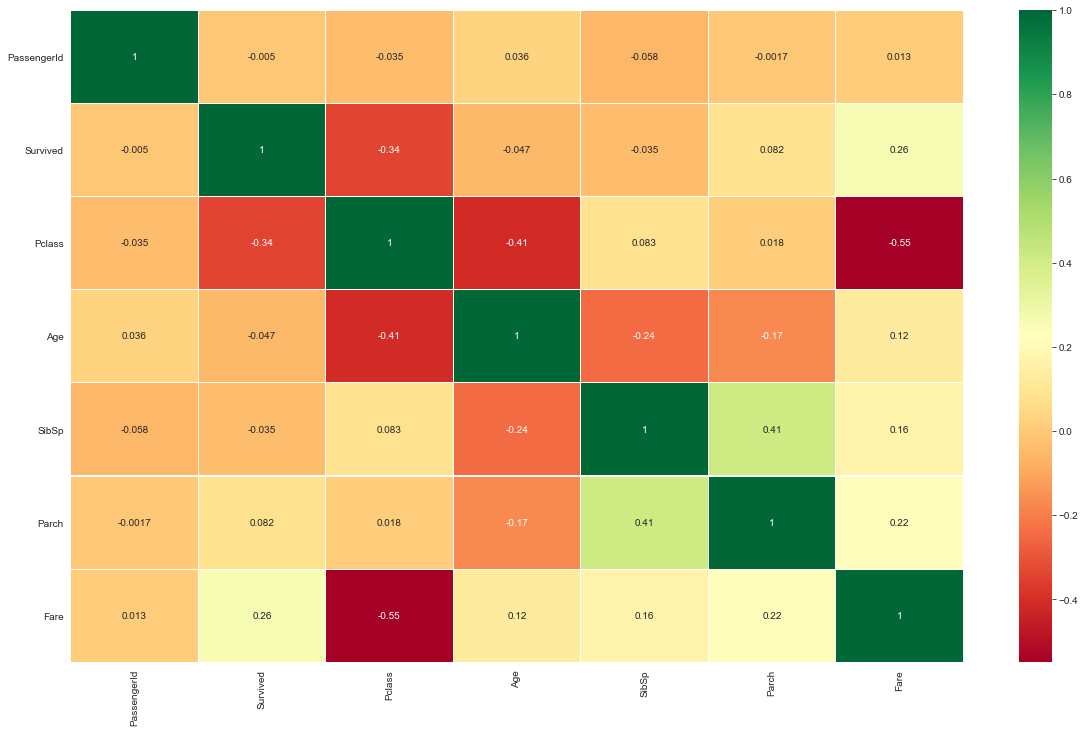

In [32]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(20,12)

In [33]:
train_data['Sex'] = train_data['Sex'].map({'male':1,'female':0})


In [34]:
test_data['Sex'] = test_data['Sex'].map({'male':1,'female':0})

In [35]:
train_data['Embarked'] = train_data['Embarked'].map({'S':1,'Q':2,'C':0})


In [36]:
test_data['Embarked'] = test_data['Embarked'].map({'S':1,'Q':2,'C':0})

In [37]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1


In [38]:
x_train = train_data.drop(['PassengerId','Name','Ticket','Survived'],axis=1)
y_train = train_data['Survived']

In [39]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
x_test = test_data.drop(['PassengerId','Name','Ticket'],axis=1)

In [41]:
x_train.shape

(891, 7)

In [42]:
y_train.shape

(891,)

In [43]:
x_test.shape

(418, 7)

# K-Nearest Neighbor

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [45]:
knn = KNeighborsClassifier(n_neighbors =3)

In [46]:
knn.fit(x_train,y_train)
knn_predict = knn.predict(x_test)
knn_accuracy = knn.score(x_train,y_train)
knn_accuracy

0.8372615039281706

## Building A Logistic Regression Model 

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression()

In [49]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
logistic_prediction=logmodel.predict(x_test)

In [51]:
log_accuracy = logmodel.score(x_train,y_train)
log_accuracy

0.8035914702581369

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
random = RandomForestClassifier(n_estimators=100)

In [54]:
random.fit(x_train,y_train)
random_forest_pred = random.predict(x_test)
random_forest_accu = random.score(x_train,y_train)
random_forest_accu

0.9820426487093153

# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
decision_tree = DecisionTreeClassifier()

In [57]:
decision_tree.fit(x_train,y_train)
decision_tree_pred = decision_tree.predict(x_test)
decision_tree.score(x_train,y_train)

0.9820426487093153

# submission file 

In [58]:
knn_submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": knn_predict})
knn_submission.to_csv('C:/Users/Ram Yadav/Downloads/data/Titanic/knn_submission.csv', index=False)

In [59]:
Logistic_submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": logistic_prediction})
Logistic_submission.to_csv('C:/Users/Ram Yadav/Downloads/data/Titanic/logRegression_submission.csv', index=False)

In [60]:
random_submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": random_forest_pred})
random_submission.to_csv('C:/Users/Ram Yadav/Downloads/data/Titanic/Random_forest_submission.csv', index=False)

In [61]:
decision_tree_submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": decision_tree_pred})
decision_tree_submission.to_csv('C:/Users/Ram Yadav/Downloads/data/Titanic/Decision_tree_submission.csv', index=False)